In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("SampleSuperstore.csv", encoding='latin1')
print(df.shape)
print(df.head())


(9994, 21)
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       4

In [12]:
# Step 2: Basic info
print("\n--- Missing Values ---")
print(df.isnull().sum())

# Step 3: Remove duplicates
df.drop_duplicates(inplace=True)
print("After removing duplicates:", df.shape)

# Step 4: Feature engineering
df['Profit Margin'] = df['Profit'] / df['Sales']
df['Discount Impact'] = df['Discount'] * df['Sales']

# Step 5: Data summary
print(df.describe())


--- Missing Values ---
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64
After removing duplicates: (9994, 21)
            Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.2000

/tmp/ipython-input-3334568656.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Sales', data=df, estimator=sum, palette='viridis')


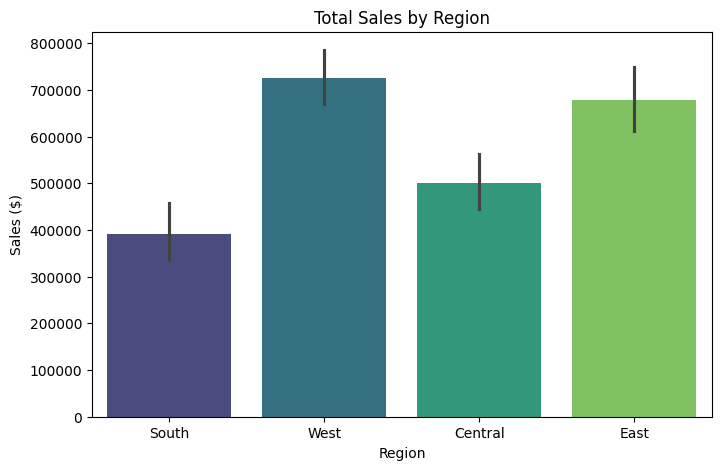

In [13]:
# Step 6: Sales by Region
plt.figure(figsize=(8,5))
sns.barplot(x='Region', y='Sales', data=df, estimator=sum, palette='viridis')
plt.title("Total Sales by Region")
plt.ylabel("Sales ($)")
plt.show()

/tmp/ipython-input-4093094445.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Profit', data=df, estimator=sum, palette='crest')


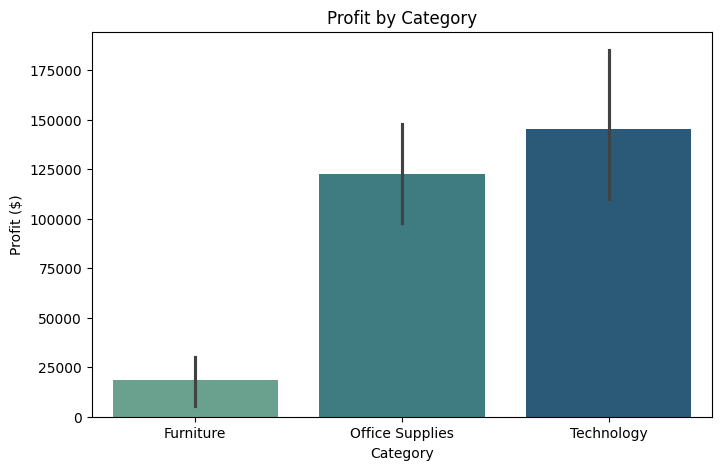

In [14]:
# Step 7: Profit by Category
plt.figure(figsize=(8,5))
sns.barplot(x='Category', y='Profit', data=df, estimator=sum, palette='crest')
plt.title("Profit by Category")
plt.ylabel("Profit ($)")
plt.show()

/tmp/ipython-input-2504836966.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='magma')


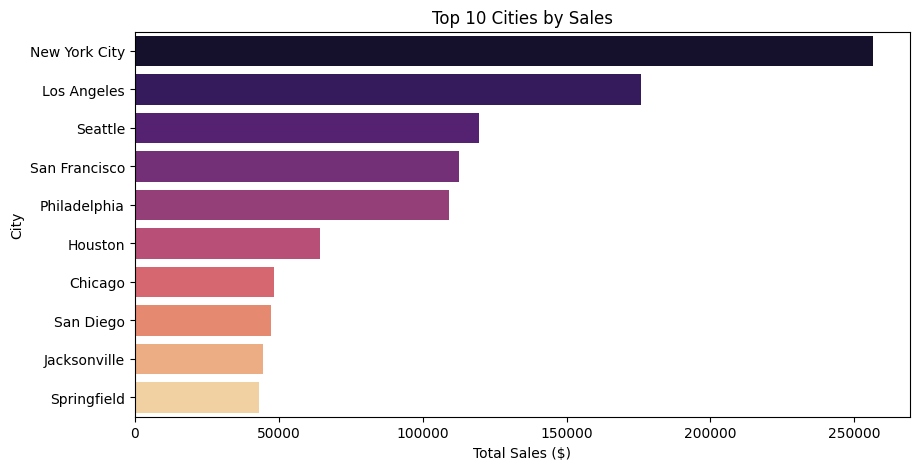

In [15]:
# Step 8: Top 10 Cities by Sales
top_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='magma')
plt.title("Top 10 Cities by Sales")
plt.xlabel("Total Sales ($)")
plt.show()

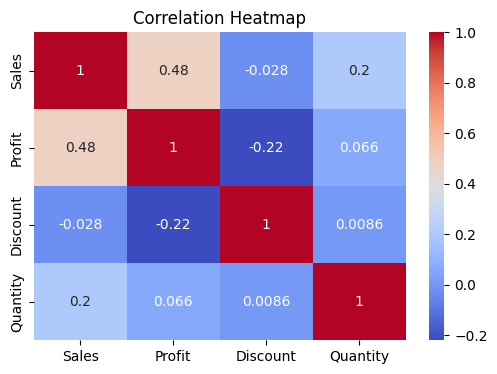

In [16]:
# Step 9: Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df[['Sales', 'Profit', 'Discount', 'Quantity']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

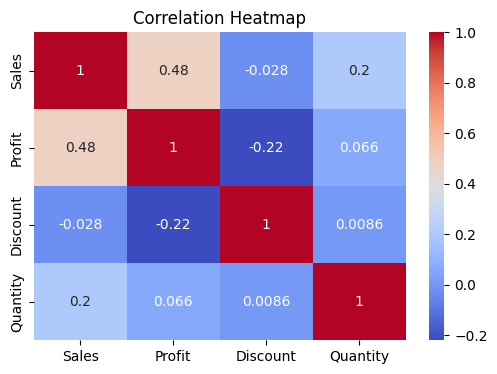

In [18]:
# Step 9: Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df[['Sales', 'Profit', 'Discount', 'Quantity']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

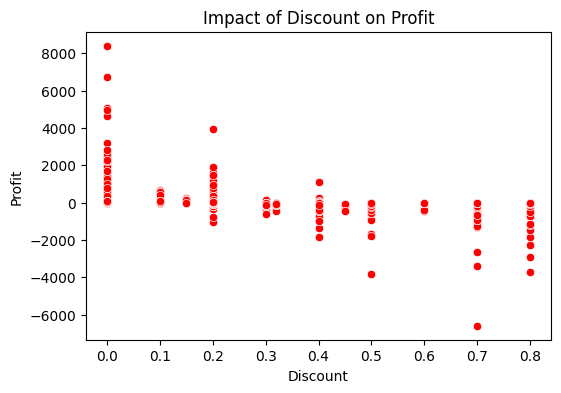

In [17]:
# Step 10: Discount vs Profit Scatter
plt.figure(figsize=(6,4))
sns.scatterplot(x='Discount', y='Profit', data=df, color='red')
plt.title("Impact of Discount on Profit")
plt.show()
